In [1]:
import pandas as pd
filename = 'Bitcoin Historical Data.csv'
df = pd.read_csv(filename)

# Display data 
print(df)


          Date      Price       Open       High        Low     Vol. Change %
0   12/15/2024  103,009.6  101,417.9  103,414.9  101,234.9  117.93K    1.57%
1   12/14/2024  101,417.7  101,423.7  102,633.0  100,626.3  105.31K   -0.01%
2   12/13/2024  101,426.2  100,008.3  101,891.2   99,214.2  162.40K    1.42%
3   12/12/2024  100,009.9  101,126.3  102,495.3   99,334.5  188.96K   -1.10%
4   12/11/2024  101,126.2   96,603.2  101,877.1   95,689.5  250.02K    4.69%
5   12/10/2024   96,600.3   97,311.5   98,237.8   94,304.5  271.45K   -0.78%
6   12/09/2024   97,359.4  101,129.7  101,198.6   94,395.8  321.01K   -3.72%
7   12/08/2024  101,115.8   99,837.0  101,339.9   98,713.9  128.93K    1.28%
8   12/07/2024   99,837.0   99,757.2  100,441.8   98,969.0  118.44K    0.08%
9   12/06/2024   99,760.7   96,968.9  101,908.5   96,452.0  213.49K    2.88%
10  12/05/2024   96,970.8   98,624.8  103,719.4   92,510.4  245.79K   -1.69%
11  12/04/2024   98,635.8   95,900.1   99,030.7   94,625.3  113.77K    2.85%

In [7]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138964 sha256=8d2255225a02631adccf32e0f3f74296c9d5c6ac4fa257148697504e1abf9a73
  Stored in directory: /Users/arjun/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf

# Retrieve Bitcoin data
bitcoin = yf.Ticker("BTC-USD")

# Get historical market data
btc_history = bitcoin.history(period="6mo")

         Date      Price       Open       High        Low     Vol. Change %
0  12/15/2024  103,009.6  101,417.9  103,414.9  101,234.9  117.93K    1.57%
1  12/14/2024  101,417.7  101,423.7  102,633.0  100,626.3  105.31K   -0.01%
2  12/13/2024  101,426.2  100,008.3  101,891.2   99,214.2  162.40K    1.42%
3  12/12/2024  100,009.9  101,126.3  102,495.3   99,334.5  188.96K   -1.10%
4  12/11/2024  101,126.2   96,603.2  101,877.1   95,689.5  250.02K    4.69%
5  12/10/2024   96,600.3   97,311.5   98,237.8   94,304.5  271.45K   -0.78%
6  12/09/2024   97,359.4  101,129.7  101,198.6   94,395.8  321.01K   -3.72%
7  12/08/2024  101,115.8   99,837.0  101,339.9   98,713.9  128.93K    1.28%
8  12/07/2024   99,837.0   99,757.2  100,441.8   98,969.0  118.44K    0.08%
9  12/06/2024   99,760.7   96,968.9  101,908.5   96,452.0  213.49K    2.88%


In [28]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


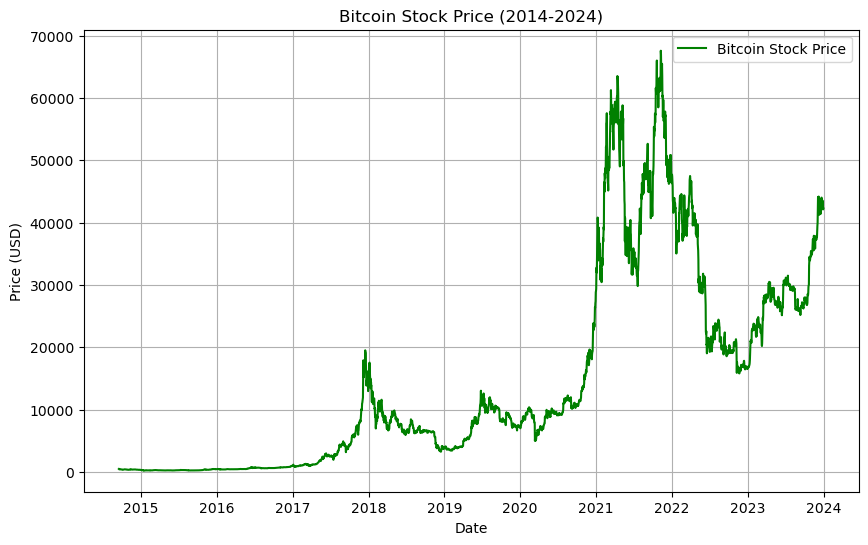

In [32]:

# Fetching Bitcoin stock data
BTC_stock = yf.download("BTC-USD", start='2014-01-01', end='2024-01-01')

# Plotting the Close price
plt.figure(figsize=(10, 6))
plt.plot(BTC_stock.index, BTC_stock['Close'], label='Bitcoin Stock Price', color='green')
plt.title('Bitcoin Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


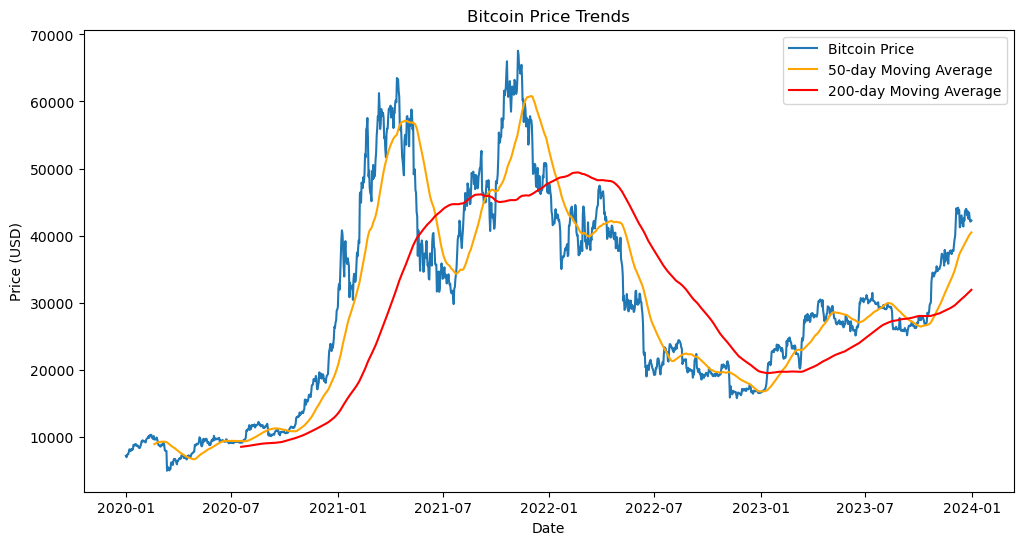

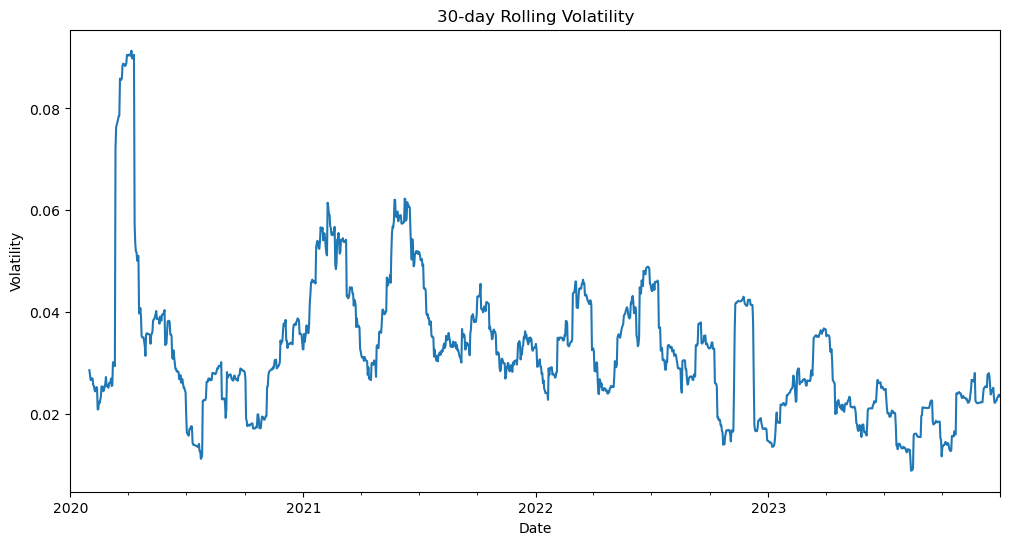

[**********************50%                       ]  2 of 4 completed

Return Statistics:
count    1460.000000
mean        0.001832
std         0.034799
min        -0.371695
25%        -0.013140
50%         0.000618
75%         0.016937
max         0.187465
Name: Daily_Return, dtype: float64


[*********************100%***********************]  4 of 4 completed
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_16100/2462226136.py:59: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  correlation_matrix = data.pct_change().corr()


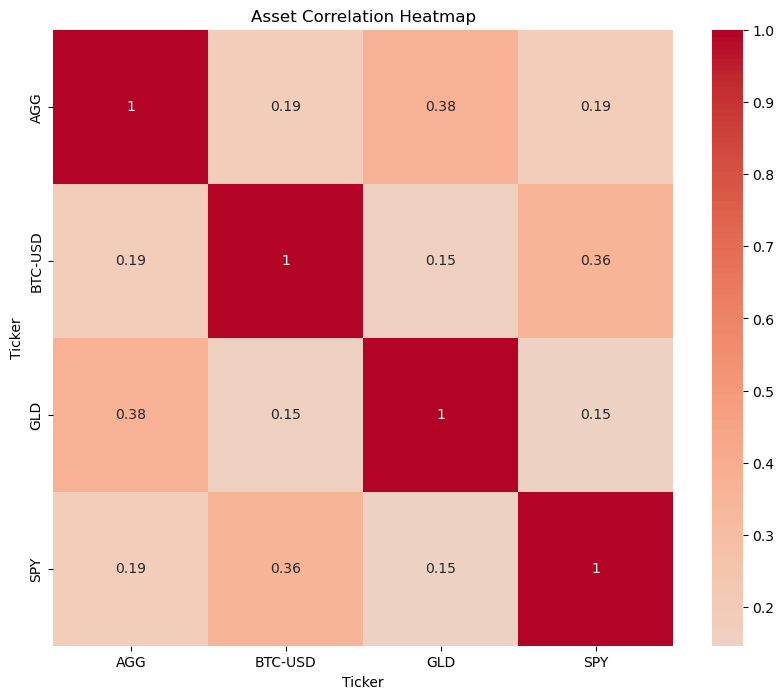

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy import stats

# Fetch Bitcoin price data
def fetch_bitcoin_data(start_date='2020-01-01', end_date='2024-01-01'):
    btc = yf.download('BTC-USD', start=start_date, end=end_date)
    return btc

# Price trend analysis
def price_trend_analysis(btc_data):
    plt.figure(figsize=(12,6))
    plt.plot(btc_data['Close'], label='Bitcoin Price')
    
    # Calculate moving averages
    btc_data['50_MA'] = btc_data['Close'].rolling(window=50).mean()
    btc_data['200_MA'] = btc_data['Close'].rolling(window=200).mean()
    
    plt.plot(btc_data['50_MA'], label='50-day Moving Average', color='orange')
    plt.plot(btc_data['200_MA'], label='200-day Moving Average', color='red')
    
    plt.title('Bitcoin Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
    
    return btc_data

# Volatility analysis
def volatility_analysis(btc_data):
    # Calculate daily returns
    btc_data['Daily_Return'] = btc_data['Close'].pct_change()
    
    # Plot volatility
    plt.figure(figsize=(12,6))
    btc_data['Daily_Return'].rolling(window=30).std().plot()
    plt.title('30-day Rolling Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.show()
    
    # Descriptive statistics of returns
    print("Return Statistics:")
    print(btc_data['Daily_Return'].describe())
    
    return btc_data

# Correlation analysis
def correlation_analysis():
    # Fetch data for Bitcoin and other assets
    assets = ['BTC-USD', 'SPY', 'GLD', 'AGG']  # Bitcoin, S&P 500, Gold, Bonds
    data = yf.download(assets, start='2020-01-01', end='2024-01-01')['Adj Close']
    
    # Calculate correlation matrix
    correlation_matrix = data.pct_change().corr()
    
    plt.figure(figsize=(10,8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Asset Correlation Heatmap')
    plt.show()
    
    return correlation_matrix

# Main execution
btc_data = fetch_bitcoin_data()
btc_with_analysis = price_trend_analysis(btc_data)
volatility_analysis(btc_with_analysis)
correlation_matrix = correlation_analysis()

In [30]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.5/927.5 kB 24.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# the following are statistical analysis numbers where we can find out the different ways these can be rounded and detailed 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from arch import arch_model

class BitcoinStatisticalAnalyzer:
    def __init__(self, start_date='2020-01-01', end_date='2024-01-01'):
        # Fetch Bitcoin data
        self.data = yf.download('BTC-USD', start=start_date, end=end_date)
        self.returns = self.data['Close'].pct_change().dropna()
        
    def basic_statistics(self):
        """Calculate and display basic statistical measures"""
        stats_dict = {
            'Mean Return': self.returns.mean(),
            'Median Return': self.returns.median(),
            'Standard Deviation': self.returns.std(),
            'Annualized Volatility': self.returns.std() * np.sqrt(252),
            'Skewness': self.returns.skew(),
            'Kurtosis': self.returns.kurtosis(),
            'Minimum': self.returns.min(),
            'Maximum': self.returns.max()
        }
        
        print("\nBasic Statistical Measures:")
        for key, value in stats_dict.items():
            print(f"{key}: {value:.4f}")
        
        return stats_dict
    
    def distribution_analysis(self):
        """Analyze return distribution and test for normality"""
        # Plot return distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(self.returns, bins=50, kde=True)
        plt.title('Bitcoin Returns Distribution')
        plt.xlabel('Daily Returns')
        plt.ylabel('Frequency')
        
        # Add normal distribution for comparison
        x = np.linspace(self.returns.min(), self.returns.max(), 100)
        plt.plot(x, stats.norm.pdf(x, self.returns.mean(), self.returns.std()) * len(self.returns) * (x[1]-x[0]))
        plt.show()
        
        # Perform normality tests
        shapiro_stat, shapiro_p = stats.shapiro(self.returns)
        ks_stat, ks_p = stats.kstest(self.returns, 'norm')
        
        print("\nNormality Tests:")
        print(f"Shapiro-Wilk Test - Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
        print(f"Kolmogorov-Smirnov Test - Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")
        
        # QQ Plot
        plt.figure(figsize=(10, 6))
        stats.probplot(self.returns, dist="norm", plot=plt)
        plt.title("Q-Q Plot of Bitcoin Returns")
        plt.show()
    
    def volatility_analysis(self):
        """Analyze Bitcoin's volatility patterns"""
        # Rolling volatility
        window_sizes = [30, 60, 90]
        plt.figure(figsize=(12, 6))
        
        for window in window_sizes:
            rolling_vol = self.returns.rolling(window=window).std() * np.sqrt(252)
            plt.plot(rolling_vol, label=f'{window}-day Rolling Volatility')
        
        plt.title('Bitcoin Rolling Volatility')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')
        plt.legend()
        plt.show()
        
        # GARCH model for volatility clustering
        model = arch_model(self.returns * 100, vol='Garch', p=1, q=1)
        results = model.fit(disp='off')
        
        print("\nGARCH(1,1) Model Results:")
        print(results.summary().tables[1])
        
        # Plot conditional volatility
        plt.figure(figsize=(12, 6))
        plt.plot(results.conditional_volatility)
        plt.title('GARCH Conditional Volatility')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.show()
    
    def extreme_value_analysis(self):
        """Analyze extreme returns and tail behavior"""
        # Value at Risk (VaR)
        var_95 = np.percentile(self.returns, 5)
        var_99 = np.percentile(self.returns, 1)
        
        # Expected Shortfall (ES/CVaR)
        es_95 = self.returns[self.returns <= var_95].mean()
        es_99 = self.returns[self.returns <= var_99].mean()
        
        print("\nRisk Metrics:")
        print(f"95% Value at Risk: {var_95:.4f}")
        print(f"99% Value at Risk: {var_99:.4f}")
        print(f"95% Expected Shortfall: {es_95:.4f}")
        print(f"99% Expected Shortfall: {es_99:.4f}")
        
        # Plot extreme returns
        plt.figure(figsize=(12, 6))
        plt.scatter(range(len(self.returns)), self.returns, alpha=0.5)
        plt.axhline(y=var_95, color='r', linestyle='--', label='95% VaR')
        plt.axhline(y=var_99, color='g', linestyle='--', label='99% VaR')
        plt.title('Bitcoin Returns with VaR Levels')
        plt.xlabel('Time')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()
    
    def stationarity_test(self):
        """Test for stationarity in returns"""
        result = adfuller(self.returns)
        
        print('\nAugmented Dickey-Fuller Test:')
        print(f'ADF Statistic: {result[0]:.4f}')
        print(f'p-value: {result[1]:.4f}')
        print('Critical values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.4f}')
    
    def run_full_analysis(self):
        """Run all analyses"""
        self.basic_statistics()
        self.distribution_analysis()
        self.volatility_analysis()
        self.extreme_value_analysis()
        self.stationarity_test()

# Create analyzer instance and run analysis
analyzer = BitcoinStatisticalAnalyzer()
analyzer.run_full_analysis()

[*********************100%***********************]  1 of 1 completed



Basic Statistical Measures:


TypeError: unsupported format string passed to Series.__format__

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

class BitcoinBasicStats:
    def __init__(self, start_date='2020-01-01', end_date='2024-01-01'):
        # Download Bitcoin data
        self.btc = yf.download('BTC-USD', start=start_date, end=end_date)
        # Calculate daily returns
        self.returns = self.btc['Close'].pct_change().dropna()
        
    def calculate_basic_stats(self):
        # Daily statistics
        daily_stats = {
            'Daily Return Statistics': {
                'Mean Return': float(self.returns.mean()),
                'Median Return': float(self.returns.median()),
                'Standard Deviation': float(self.returns.std()),
                'Daily Volatility': float(self.returns.std()),
                'Skewness': float(self.returns.skew()),
                'Kurtosis': float(self.returns.kurtosis()),
                'Minimum Return': float(self.returns.min()),
                'Maximum Return': float(self.returns.max())
            }
        }
        
        # Annualized statistics
        annualized_stats = {
            'Annualized Statistics': {
                'Annualized Mean Return': float(self.returns.mean() * 252),
                'Annualized Volatility': float(self.returns.std() * np.sqrt(252))
            }
        }
        
        # Print results
        print("\nBitcoin Statistical Analysis")
        print("=" * 50)
        
        print("\nDaily Return Statistics:")
        print("-" * 30)
        for key, value in daily_stats['Daily Return Statistics'].items():
            print(f"{key}: {value:.4%}")
            
        print("\nAnnualized Statistics:")
        print("-" * 30)
        for key, value in annualized_stats['Annualized Statistics'].items():
            print(f"{key}: {value:.4%}")
            
        return {**daily_stats, **annualized_stats}

# Run the analysis
def run_analysis(start_date='2020-01-01', end_date='2024-01-01'):
    analyzer = BitcoinBasicStats(start_date, end_date)
    return analyzer.calculate_basic_stats()

# Execute the analysis
if __name__ == "__main__":
    stats = run_analysis()

[*********************100%***********************]  1 of 1 completed


Bitcoin Statistical Analysis

Daily Return Statistics:
------------------------------
Mean Return: 0.1832%
Median Return: 0.0618%
Standard Deviation: 3.4799%
Daily Volatility: 3.4799%
Skewness: -64.2585%
Kurtosis: 1176.4617%
Minimum Return: -37.1695%
Maximum Return: 18.7465%

Annualized Statistics:
------------------------------
Annualized Mean Return: 46.1787%
Annualized Volatility: 55.2413%



/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Mean Return': float(self.returns.mean()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Median Return': float(self.returns.median()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'Standard Deviation': float(self.returns.std()),
/var/folders/t6/rzjf7_pd5tbb7qglvk4p205r0000gn/T/ipykernel_18866/659983074.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError 